<h1><center>Advanced Regression Assignment</center><h1>

### PART-1 : Importing Data and Taking glimpse at it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There are missing values in the dataset

In [5]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

It looks like there are a few outliers, we will look at those in part-2

### PART - 2: Understanding and Cleaning Data

#### Treating missing values
Taking a look at the percentage amount of missing data in every column

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
missing_value_df

column_name  percent_missing
PoolQC            PoolQC        99.520548
MiscFeature  MiscFeature        96.301370
Alley              Alley        93.767123
Fence              Fence        80.753425
FireplaceQu  FireplaceQu        47.260274
...                  ...              ...
ExterQual      ExterQual         0.000000
Exterior2nd  Exterior2nd         0.000000
Exterior1st  Exterior1st         0.000000
RoofMatl        RoofMatl         0.000000
SalePrice      SalePrice         0.000000

[81 rows x 2 columns]

#### Data is very less in this case so we cannot afford to lose a lot of rows therefore we are taking the removal `threshold to 5%` for column removal and less than that for row removal. If in the end we don't get a good model then we will try to tweek these values 

Let's visualize columns whose missing percentage is below 5%

[]

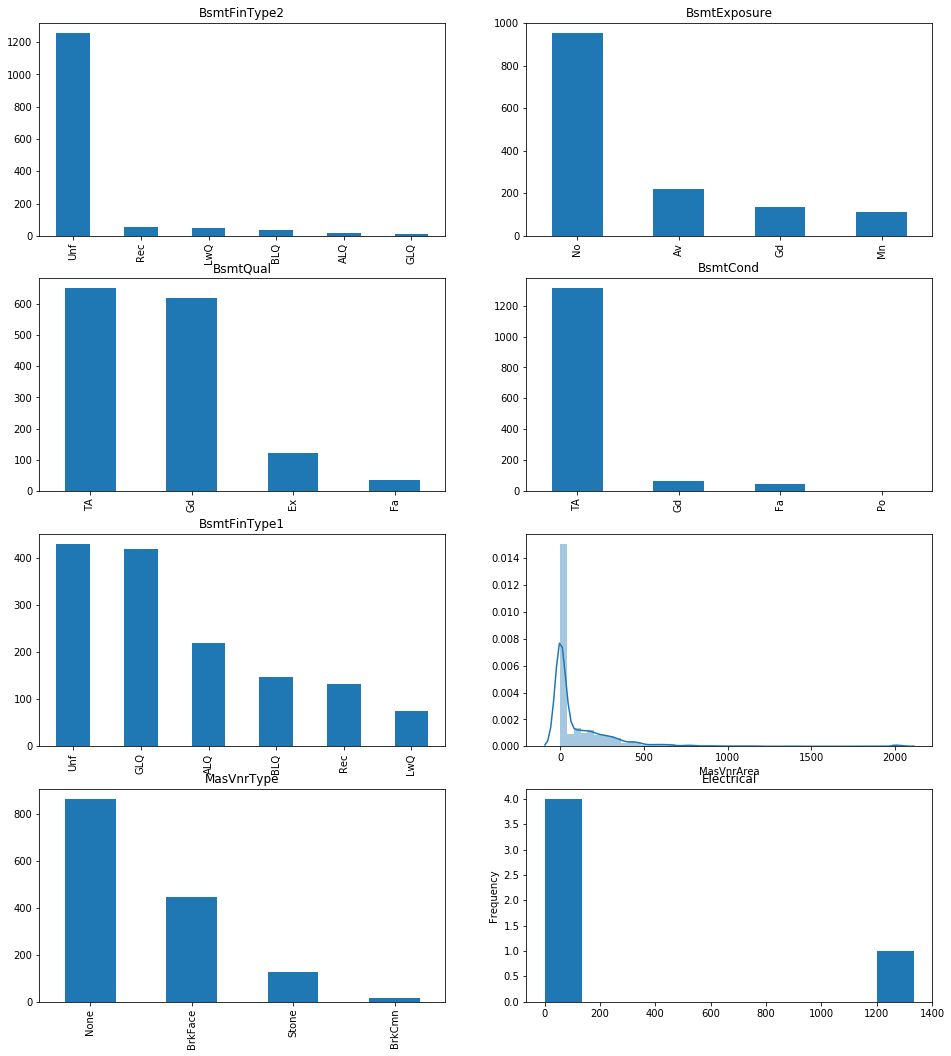

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(16,18))
df['BsmtFinType2'].value_counts().plot.bar(ax=axes[0,0],title='BsmtFinType2')
df['BsmtExposure'].value_counts().plot.bar(ax=axes[0,1],title='BsmtExposure')
df['BsmtQual'].value_counts().plot.bar(ax=axes[1,0],title='BsmtQual')
df['BsmtCond'].value_counts().plot.bar(ax=axes[1,1],title='BsmtCond')
df['BsmtFinType1'].value_counts().plot.bar(ax=axes[2,0],title='BsmtFinType1')
sns.distplot(df['MasVnrArea'].fillna(2021),ax=axes[2,1])
#df['MasVnrArea'].value_counts().plot.hist(ax=axes[2,1],title='MasVnrArea')
df['MasVnrType'].value_counts().plot.bar(ax=axes[3,0],title='MasVnrType')
df['Electrical'].value_counts().plot.hist(ax=axes[3,1],title='Electrical')
plt.plot()

As we can see that columns `BsmtFinType2`, `BsmtExposure`, `BsmtCond`, `Electrical` are having very high percentage of one particular value in each. 
column `MasVnrType` also have a mean value which is quite steep in nature.
So we will fill categorical columns `BsmtFinType2`, `BsmtExposure`, `BsmtCond`, `Electrical` with ***mode.***
And numerical column `MasVnrArea` with ***mean value***

But for the columns `BsmtQual`, `BsmtFinType1`, `MasVnrType`, the data is spread in considerable amount in all the classes.
Randomly adding values may lead to false data insertion. For these column the probability of data to falsify is very high.

BsmtQual	:	2.534247
BsmtFinType1	:	2.534247
MasVnrType	:	0.547945

Since we don't have enough data to train on we will drop columns `BsmtQual` and `BsmtFinType1`
And we will delete the null value rows for `MasVnrType`
If in the end we don't get a good model then we will try to tweek these values

In [8]:
column_mode =['BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'Electrical']
column_mean = ['MasVnrArea']
column_remove = ['BsmtQual','BsmtFinType1']


In [9]:
for i in column_mode:
    df[i].fillna(df[i].mode()[0], inplace=True)
for i in column_mean:
    df[i].fillna(df[i].mean(), inplace=True)  

Now we have removed all the NA values with mode and mean

In [10]:
df.drop(column_remove,axis=1,inplace=True)

Dropped all the columns which we cannnot handle. 

Now we will be droping rest of the columns with missing percentage greater than 5%

In [11]:
columns_to_drop = missing_value_df[missing_value_df['percent_missing']>5].index
df2 = df.drop(columns_to_drop,axis=1)

Now dropping a few remaining nan values left 

In [12]:
df2 = df2.dropna()

In [13]:
#cols = ['BsmtFinType2', 'BsmtExposure', 'BsmtCond']
#for i in cols:
#    df2.pop(i)

#### We can also drop `id` column as it is of no use

In [14]:
df2 = df2.drop('Id',axis=1)

In [15]:
df2.shape

(1452, 67)

df2 is our final dataframe

In [16]:
df2.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0          60       RL     8450   Pave      Reg         Lvl    AllPub   
1          20       RL     9600   Pave      Reg         Lvl    AllPub   
2          60       RL    11250   Pave      IR1         Lvl    AllPub   
3          70       RL     9550   Pave      IR1         Lvl    AllPub   
4          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtCond BsmtExposure  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0      PConc       TA           No         706          Unf           0   
1     CBlock       TA           Gd         978          Unf           0   
2      PConc       TA           Mn         486          Unf           0   
3     BrkTil       Gd           No         216          Unf           0   
4      PConc       TA           Av         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces  GarageCars  GarageArea PavedDrive  WoodDeckSF  OpenPorchSF  \
0           0           2         548          Y           0           61   
1           1           2         460          Y         298            0   
2           1           2         608          Y           0           42   
3           1  

#### Outlier treatment

In [17]:
percentile = [0.85,0.90,0.95,1.00]
df2.describe(percentiles = percentile)

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1452.000000    1452.000000  1452.000000  1452.000000  1452.000000   
mean     56.949036   10507.276171     6.092975     5.579201  1971.116391   
std      42.340097    9989.563592     1.381289     1.113136    30.193761   
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   
50%      50.000000    9478.500000     6.000000     5.000000  1972.000000   
85%      90.000000   13141.450000     8.000000     7.000000  2004.350000   
90%     120.000000   14373.900000     8.000000     7.000000  2006.000000   
95%     160.000000   17299.350000     8.000000     8.000000  2007.000000   
100%    190.000000  215245.000000    10.000000     9.000000  2010.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   1452.000000  1452.000000  1452.000000  1452.000000  1452.000000   
mean    1984.775482   103.685262   441.970386    46.805785   567.070937   
std       20.652466   181.066207   455.360279   161.726239   442.082927   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
50%     1993.000000     0.000000   381.000000     0.000000   477.500000   
85%     2006.000000   262.350000   926.400000     0.000000  1010.700000   
90%     2006.000000   335.000000  1063.500000   118.800000  1231.600000   
95%     2007.000000   456.000000  1271.800000   397.800000  1468.000000   
100%    2010.000000  1600.000000  5644.000000  1474.000000  2336.000000   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1452.000000  1452.000000  1452.000000   1452.000000  1452.000000   
mean   1055.847107  1161.270661   346.944215      5.876722  1514.091598   
std     438.119089   385.018424   436.370724     48.754995   525.627765   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
50%     990.500000  1086.000000     0.000000      0.000000  1461.500000   
85%    1484.350000  1572.000000   868.700000      0.000000  1984.050000   
90%    1601.800000  1679.900000   953.600000      0.000000  2157.900000   
95%    1748.700000  1826.900000  1141.450000      0.000000  2463.800000   
100%   6110.000000  4692.000000  2065.000000    572.000000  5642.000000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1452.000000   1452.000000  1452.000000  1452.000000   1452.000000   
mean       0.423554      0.057851     1.562672     0.381543      2.867080   
std        0.518782      0.239372     0.550231     0.502664      0.814812   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
85%        1.000000      0.000000     2.000000     1.000000      4.000000   
90%        1.000000      0.000000     2.000000     1.000000      4.000000   
95%        1.000000      1.000000     2.000000     1.000000      4.000000   
100%       3.000000      2.000000     3.000000     2.000000      8.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces   GarageCars   GarageArea  \
count   1452.000000   1452.000000  1452.000000  1452.000000  1452.000000   
mean       1.046143      6.517218     0.612259     1.765152   472.475207   
std        0.219498      1.626065     0.643422     0.748496   214.106397   
min        0.000000      2.000000     0.000000     0.000000     0.000000   
50%        1.000000      6.000000     1.000000     2.000000   478.000000   
85%        1.000000      8.000000     1.000000     2.000000   672.000000   
90%        1.000000      9.000000     1.000000     3.000000   756.900000   
95%        1.000000     10.000000     2.000000     3.000000   8

`'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 
'OpenPorchSF','EnclosedPorch','3SsnPorch','PoolArea','MiscVal','SalePrice'`  shows steep increase in values when measured at 95 percentile and 100 percentile

Since there are many columns. The 5% statistical outlier might not be inclusive for all the above columns. Treating these columns might lead to loss of data. Because of limited data, we are skipping this step as of now,
But if we do not get a better result in the end, we might end up tweeking these values

Now let's see the scatter plot of all the columns, and see if we can pick out any information or not

<Figure size 1440x720 with 0 Axes>

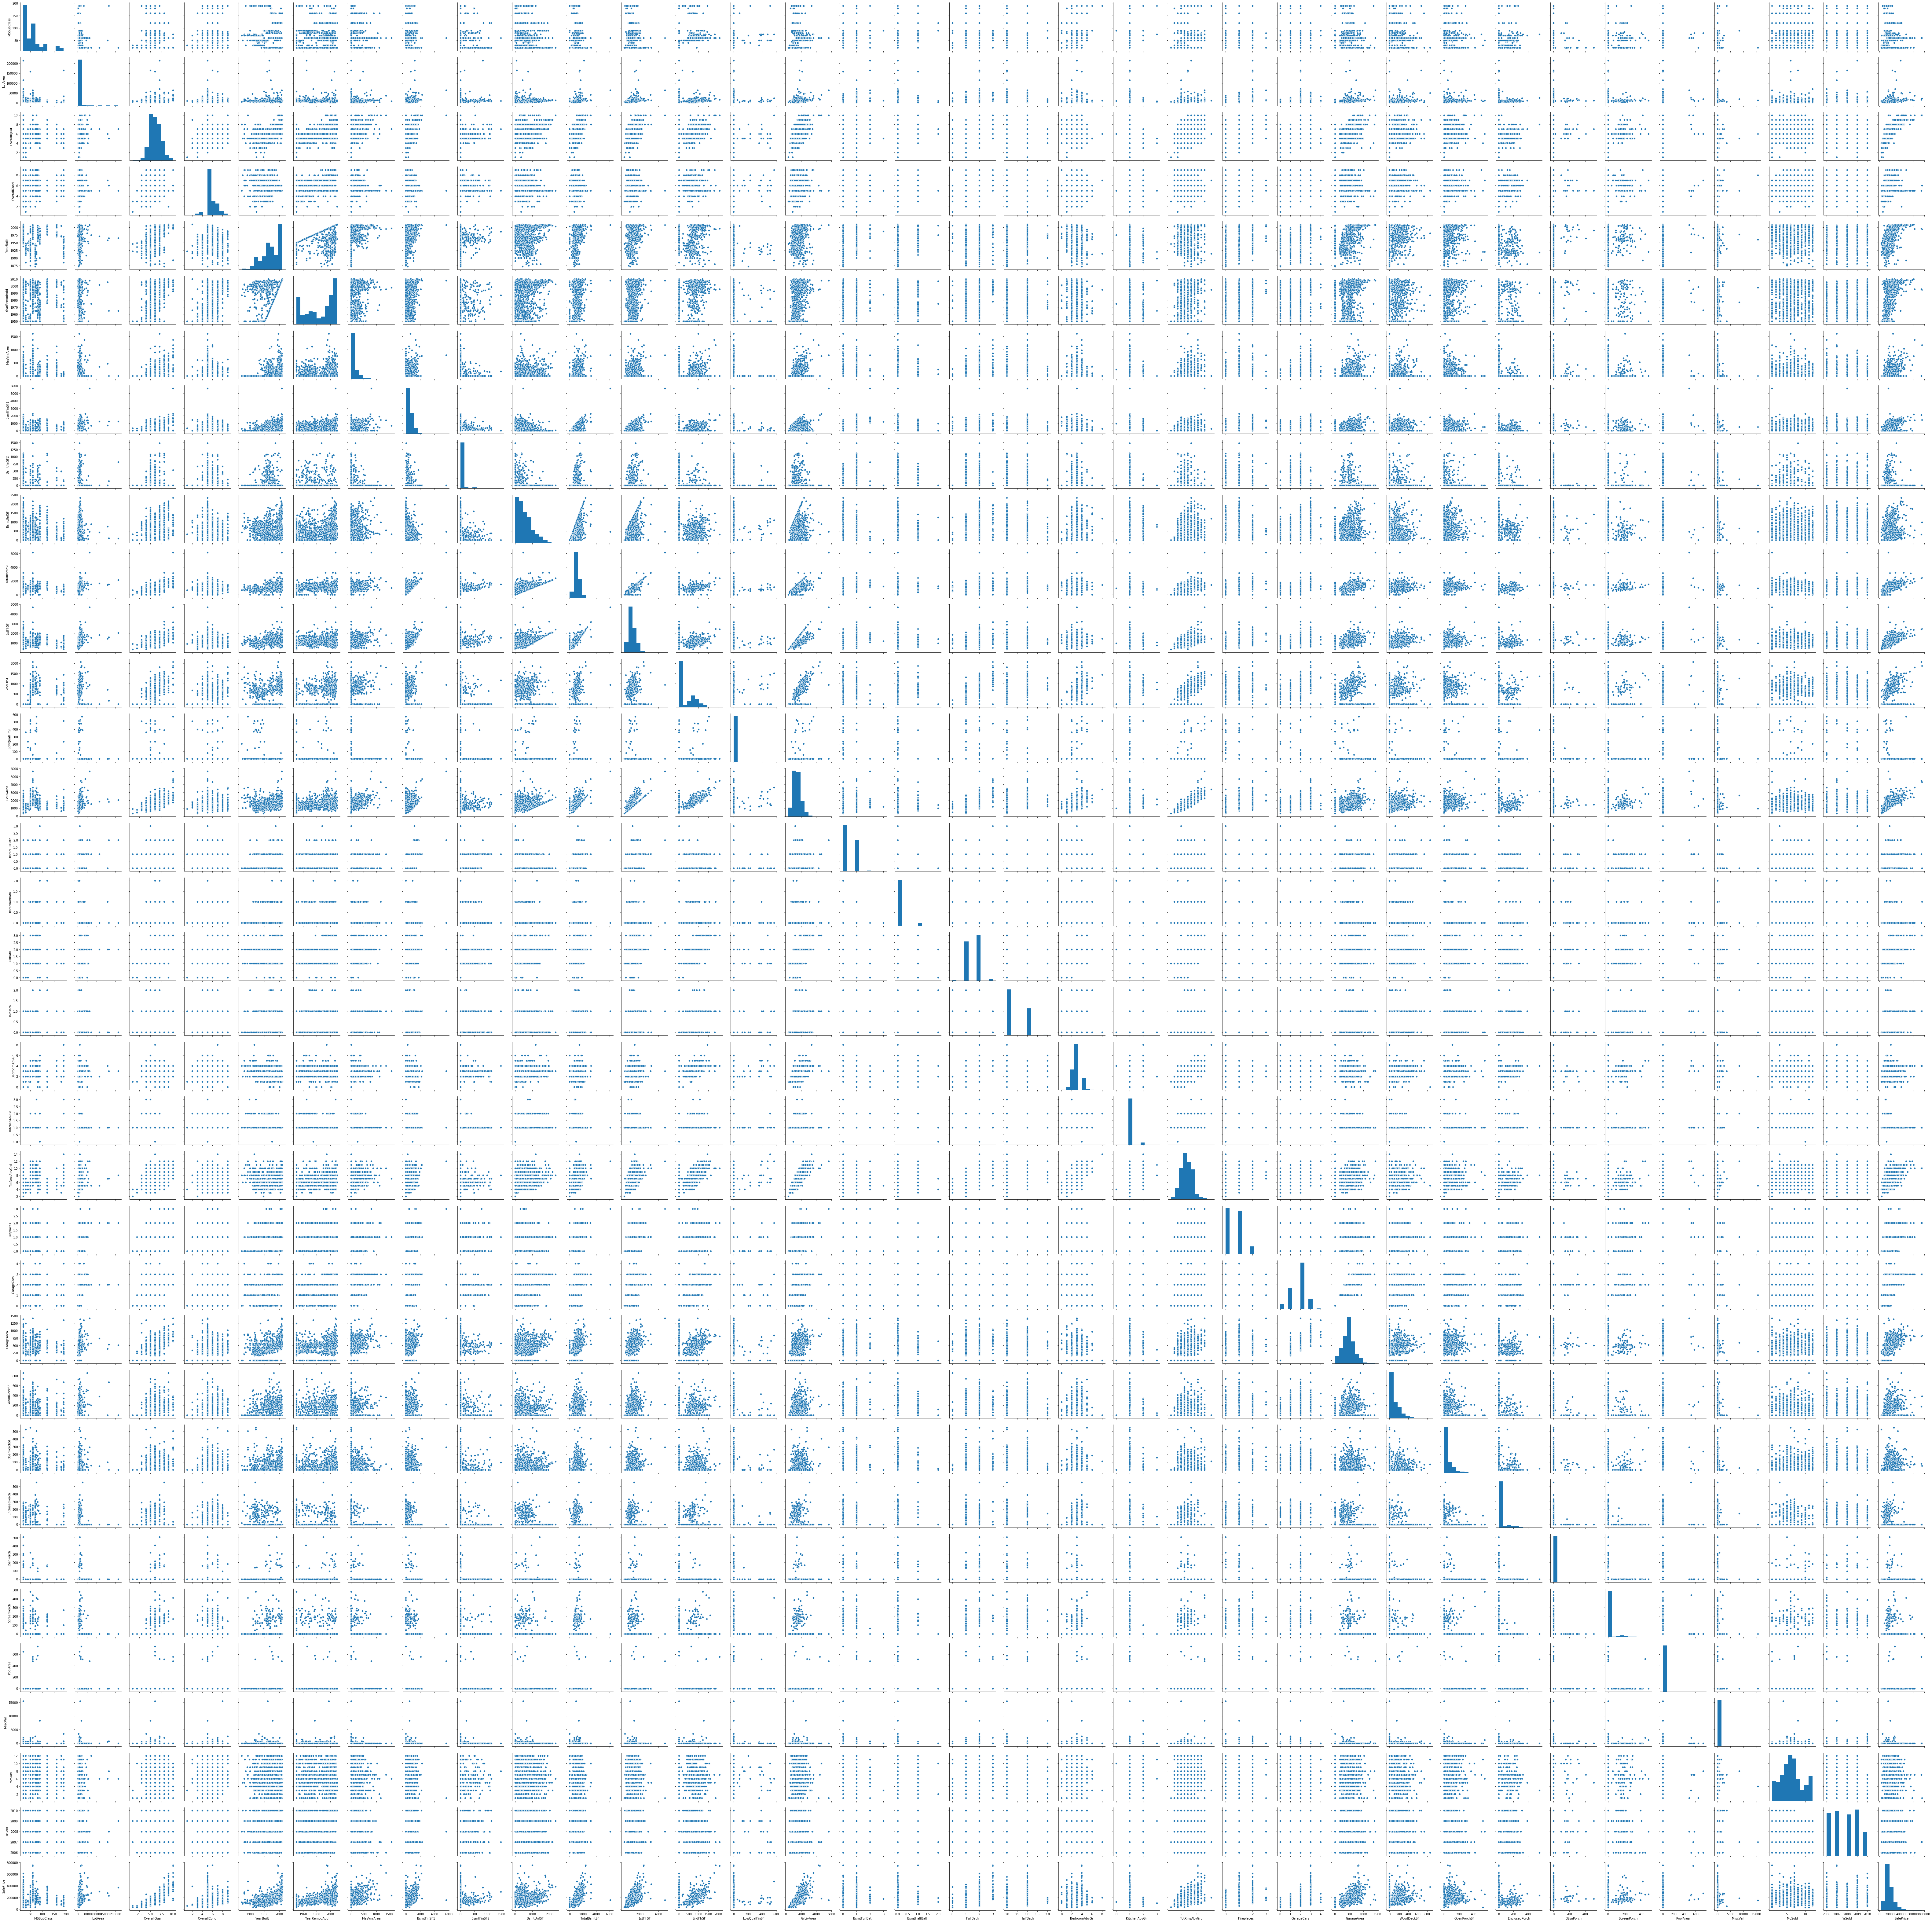

In [18]:
# paiwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(df2)
plt.show()

#### This scatter plot is a little difficult to comprehend because of very large number of variables

In [19]:
# correlation matrix
cor = df2.corr()
cor

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass       1.000000 -0.138054     0.034491    -0.061330   0.028397   
LotArea         -0.138054  1.000000     0.106324    -0.002269   0.015639   
OverallQual      0.034491  0.106324     1.000000    -0.090628   0.571111   
OverallCond     -0.061330 -0.002269    -0.090628     1.000000  -0.376763   
YearBuilt        0.028397  0.015639     0.571111    -0.376763   1.000000   
YearRemodAdd     0.041047  0.015126     0.549573     0.075121   0.590674   
MasVnrArea       0.022936  0.104160     0.411876    -0.128101   0.315707   
BsmtFinSF1      -0.069575  0.213063     0.236823    -0.041927   0.249239   
BsmtFinSF2      -0.066137  0.111686    -0.058039     0.039333  -0.047816   
BsmtUnfSF       -0.138922 -0.004227     0.309602    -0.136934   0.149810   
TotalBsmtSF     -0.236906  0.258409     0.537122    -0.167230   0.392562   
1stFlrSF        -0.250050  0.295919     0.476936    -0.138814   0.284570   
2ndFlrSF         0.308104  0.052935     0.298543     0.027473   0.009566   
LowQualFinSF     0.046413  0.004904    -0.029998     0.025140  -0.183749   
GrLivArea        0.076930  0.261159     0.594417    -0.076541   0.199343   
BsmtFullBath     0.003807  0.157702     0.108505    -0.051567   0.186305   
BsmtHalfBath    -0.002633  0.048377    -0.039207     0.117290  -0.037072   
FullBath         0.136306  0.122457     0.552266    -0.190396   0.469625   
HalfBath         0.176165  0.016290     0.271466    -0.061434   0.240417   
BedroomAbvGr    -0.021651  0.117778     0.105900     0.014274  -0.068619   
KitchenAbvGr     0.286572 -0.024697    -0.184642    -0.081254  -0.173951   
TotRmsAbvGrd     0.042406  0.187990     0.430549    -0.055964   0.097440   
Fireplaces      -0.044466  0.269643     0.400398    -0.020120   0.150148   
GarageCars      -0.039043  0.154739     0.599734    -0.184866   0.537492   
GarageArea      -0.098141  0.180778     0.560543    -0.151062   0.478439   
WoodDeckSF      -0.012634  0.173167     0.240652    -0.004530   0.226891   
OpenPorchSF     -0.005462  0.086301     0.303482    -0.031172   0.185081   
EnclosedPorch   -0.010571 -0.023094    -0.112950     0.074731  -0.386839   
3SsnPorch       -0.044049  0.020574     0.031029     0.025163   0.032037   
ScreenPorch     -0.026414  0.043511     0.066403     0.054016  -0.049169   
PoolArea         0.008214  0.077888     0.065743    -0.002229   0.005310   
MiscVal         -0.007805  0.038226    -0.031129     0.068642  -0.034048   
MoSold          -0.013840  0.003203     0.068760    -0.004034   0.009362   
YrSold          -0.021529 -0.012977    -0.025186     0.043433  -0.014441   
SalePrice       -0.082813  0.264674     0.789997    -0.076294   0.522896   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
MSSubClass         0.041047    0.022936   -0.069575   -0.066137  -0.138922   
LotArea            0.015126    0.104160    0.213063    0.111686  -0.004227   
OverallQual        0.549573    0.411876    0.236823   -0.058039   0.309602   
OverallCond        0.075121   -0.128101   -0.041927    0.039333  -0.136934   
YearBuilt          0.590674    0.315707    0.249239   -0.047816   0.149810   
YearRemodAdd       1.000000    0.179618    0.127609   -0.066672   0.181828   
MasVnrArea         0.179618    1.000000    0.264736   -0.072319   0.114442   
BsmtFinSF1         0.127609    0.264736    1.000000   -0.049287  -0.496137   
BsmtFinSF2        -0.066672   -0.072319   -0.049287    1.000000  -0.209705   
BsmtUnfSF          0.181828    0.114442   -0.496137   -0.209705   1.000000   
TotalBsmtSF        0.291492    0.363936    0.520533    0.106309   0.415976   
1stFlrSF           0.242488    0.344501    0.443232    0.098824   0.318214   
2ndFlrSF           0.140225    0.174561   -0.135715   -0.099560   0.006148   
LowQualFinSF      -0.062045   -0.069071   -0.064345    0.014620   0.028278   
GrLivArea          0.288279    0.390857    0.206027   -0.008910   0.240816   
BsmtFullBath       0.118169   

In [20]:
'''
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()
'''

'\n# plotting correlations on a heatmap\n\n# figure size\nplt.figure(figsize=(16,8))\n\n# heatmap\nsns.heatmap(cor, cmap="YlGnBu", annot=True)\nplt.show()\n'

Heatmap will be difficult to comprehend. Therefore just looking at minimum and maximum values of correlation

In [21]:
corunstack =cor.unstack()
corunstack[corunstack<1].sort_values()[::2]

BsmtFinSF1    BsmtUnfSF       -0.496137
BsmtFullBath  BsmtUnfSF       -0.422231
YearBuilt     EnclosedPorch   -0.386839
OverallCond   YearBuilt       -0.376763
MSSubClass    1stFlrSF        -0.250050
                                 ...   
SalePrice     GrLivArea        0.710080
              OverallQual      0.789997
TotalBsmtSF   1stFlrSF         0.818246
GrLivArea     TotRmsAbvGrd     0.825476
GarageCars    GarageArea       0.882332
Length: 595, dtype: float64

Now we can see that `BsmtFinSF1` is mostly negatively correlated with `BsmtUnfSF` with a value of -0.49, And next to which is  `BsmtFullBath and BsmtUnfSF` = -0.422
On the other side `GarageArea and GarageCars` are 0.882 are the most positive correlations

### PART-3 : Preparing Data

Now lets create dummy variables for the categorical variables

In [22]:
categoricalvar = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                 'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                 'MasVnrType','ExterQual','ExterCond','Foundation','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
                 'Functional','PavedDrive','SaleType','SaleCondition','BsmtFinType2', 'BsmtExposure', 'BsmtCond']
numericalvar =['LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2',
              'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr',
              'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
              'ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice','MSSubClass','OverallQual','OverallCond']

variables `'OverallQual','OverallCond','MSSubClass'` are categorical variables, so we will use label encoder for these.

In [23]:
df2[['OverallQual','OverallCond','MSSubClass']].head()

OverallQual  OverallCond  MSSubClass
0            7            5          60
1            6            8          20
2            7            5          60
3            7            5          70
4            8            5          60

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df2['MSSubClass'] = le.fit_transform(df2['MSSubClass'])

We have not converted `'OverallQual','OverallCond'` because they are already in range of 1-10

Creating Dummy variables for the columns

In [25]:

# creating dummy variables for categorical variables

# convert into dummies
housing_dummies = pd.get_dummies(df2[categoricalvar], drop_first=True)
housing_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0  

Our Dummy variables are created as above, and now we will concatenate above dummy variables with original dataframe

In [26]:
df3 = pd.concat([df2,housing_dummies],axis=1)
df3.head()

MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0           5       RL     8450   Pave      Reg         Lvl    AllPub   
1           0       RL     9600   Pave      Reg         Lvl    AllPub   
2           5       RL    11250   Pave      IR1         Lvl    AllPub   
3           6       RL     9550   Pave      IR1         Lvl    AllPub   
4           5       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtCond BsmtExposure  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0      PConc       TA           No         706          Unf           0   
1     CBlock       TA           Gd         978          Unf           0   
2      PConc       TA           Mn         486          Unf           0   
3     BrkTil       Gd           No         216          Unf           0   
4      PConc       TA           Av         655          Unf           0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0        150          856    GasA        Ex          Y      SBrkr       856   
1        284         1262    GasA        Ex          Y      SBrkr      1262   
2        434          920    GasA        Ex          Y      SBrkr       920   
3        540          756    GasA        Gd          Y      SBrkr       961   
4        490         1145    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces  GarageCars  GarageArea PavedDrive  WoodDeckSF  OpenPorchSF  \
0           0           2         548          Y           0           61   
1           1           2         460          Y         298            0   
2           1           2         608          Y           0           42   
3           1  

In [27]:
df3.shape

(1452, 240)

Now dropping original variables which are no longer needed

In [28]:
df3.drop(categoricalvar,axis=1,inplace=True)
df3.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0           5     8450            7            5       2003          2003   
1           0     9600            6            8       1976          1976   
2           5    11250            7            5       2001          2002   
3           6     9550            7            5       1915          1970   
4           5    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  \
0         0        0       2    2008     208500            0            0   
1         0        0       5    2007     181500            0            0   
2         0        0       9    2008     223500            0            0   
3         0        0       2    2006     140000            0            0   
4         0        0      12    2008     250000            0            0   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0            1            0            1             0             0   
1            1            0            1             0             0   
2            1            0            1             0             0   
3            1            0            1             0             0   
4            1            0            1             0             0   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0             1                0                0                1   
1             1                0                0                1   
2             0                0                0                1   
3             0                0                0                1   
4             0                0                0                1   

   Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                 0                  0              0              0   
1                 0                  0              1              0   
2                 0                  0              0              0   
3                 0                  0   

In [29]:
df3.shape

(1452, 208)

In [30]:
#popcols = ['MSSubClass','OverallQual','OverallCond']
#for i in popcols:
#    df3.pop(i)

Now df3 is our final dataframe

Dividing data into Train_Test split

In [71]:
# split into train and test

df_train, df_test = train_test_split(df3,train_size=0.9,test_size = 0.1, random_state=100)

We will be solving problem using k fold cross validation. That is the reason for only 10% of test data

Scalling the training variables

In [72]:
# Standardising the values
scaler = StandardScaler()
df_train[numericalvar] = scaler.fit_transform(df_train[numericalvar])

c:\users\ankit.chaturvedi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\ankit.chaturvedi\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [73]:
df_train.head()

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
531     0.426447 -0.419932    -0.070818     2.135747  -1.692991      0.674263   
1104    1.857555 -0.815832    -0.793380    -0.525785  -0.037645     -0.744382   
685     1.857555 -0.524478     0.651744    -0.525785   0.425853     -0.059519   
1051   -1.004661  0.060237     0.651744    -0.525785   1.187312      1.065613   
1347   -1.004661  0.455372     1.374307    -0.525785   1.154205      1.065613   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
531    -0.573257   -0.972279   -0.285999   0.108816    -1.005538 -1.058354   
1104    1.131970   -0.972279   -0.285999   0.152211    -0.962489 -1.370193   
685    -0.573257    0.836451    0.836796  -0.875563     0.306315  0.073027   
1051   -0.573257   -0.972279   -0.285999   1.718996     0.591796  0.397752   
1347   -0.012327   -0.797522   -0.285999   2.486401     1.534336  1.583254   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
531   0.608458     -0.124384  -0.288012     -0.820120     -0.238348         2   
1104  0.748517     -0.124384  -0.401859     -0.820120     -0.238348         2   
685   1.272014     -0.124384   1.093322      1.095938     -0.238348         2   
1051 -0.794423     -0.124384  -0.375294     -0.820120     -0.238348         2   
1347 -0.794423     -0.124384   0.497527      1.095938     -0.238348         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
531          0      0.184656     -0.214647     -0.311535   -0.944660   
1104         1      0.184656     -0.214647     -0.311535   -0.944660   
685          0      0.184656     -0.214647     -0.311535    0.601362   
1051         0      0.184656     -0.214647     -0.311535    0.601362   
1347         0      0.184656     -0.214647      0.301213    0.601362   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
531     0.318348    0.141289   -0.750620    -0.701933       1.003789   
1104    0.318348   -0.145994   -0.750620    -0.701933      -0.360159   
685     0.318348    0.488810    1.008381    -0.701933      -0.360159   
1051    0.318348   -0.145994   -0.750620    -0.397044      -0.360159   
1347    1.650921    1.114346   -0.750620    -0.701933      -0.360159   

      3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  \
531   -0.122554    -0.266619 -0.067606 -0.087539 -0.108117  0.126701   
1104  -0.122554    -0.266619 -0.067606 -0.087539 -0.845461 -0.622038   
685   -0.122554    -0.266619 -0.067606 -0.087539  0.997898 -0.622038   
1051  -0.122554    -0.266619 -0.067606 -0.087539  1.366569 -0.622038   
1347  -0.122554    -0.266619 -0.067606 -0.087539 -0.476789 -0.622038   

      SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
531   -0.669169            0            0            0            1   
1104  -0.949719            0            0            0            1   
685    0.344637            0            0            1            0   
1051   0.250793            0            0            1            0   
1347   1.313338            0            0            1            0   

      Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
531             1             0             0             0                0   
1104            1             0             0             1                0   
685             1             0             0             0                0   
1051            1             0             0             0                0   
1347            1             0             0             0                1   

      LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
531                 0                1                 0                  0   
1104                0                1                 0                  0   
685                 0                1                 0                  1   
1051                0                1  

In [74]:
df_train.shape

(1306, 208)

In [75]:
y_train = df_train.pop('SalePrice')
X_train = df_train

We have now created `X_train and y_train`, which is our clean dataset

#### Setting up test dataset

Transforming Test dataset

In [76]:
df_test[numericalvar] = scaler.transform(df_test[numericalvar])
df_test.head()

c:\users\ankit.chaturvedi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\ankit.chaturvedi\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
157     0.187929  0.139436     1.374307    -0.525785   1.253526      1.212369   
337    -1.004661 -0.134891     0.651744    -0.525785   1.021777      0.869938   
1120   -0.766143 -0.218299    -0.070818    -0.525785  -1.692991     -1.722758   
563    -0.050589  1.074617    -0.070818     1.248570  -1.759205     -1.722758   
371    -0.050589  0.628883    -1.515942    -1.412963  -0.401821     -1.282489   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
157    -0.102075   -0.972279   -0.285999   0.481099    -0.636225 -0.999079   
337     0.060594    0.797131   -0.285999   0.371470     1.090254  0.964731   
1120   -0.573257   -0.972279   -0.285999   1.024677    -0.096984 -0.385711   
563    -0.573257   -0.972279   -0.285999   1.369553     0.245140  0.003443   
371    -0.573257   -0.972279   -0.285999  -1.286673    -2.389893 -0.107375   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
157   1.947050     -0.124384   0.861835     -0.820120     -0.238348         2   
337  -0.794423     -0.124384   0.042142      1.095938     -0.238348         2   
1120 -0.794423     -0.124384  -0.952115     -0.820120     -0.238348         1   
563   0.378854     -0.124384   0.303988     -0.820120     -0.238348         2   
371   0.280124     -0.124384   0.140808     -0.820120     -0.238348         2   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
157          1      1.421378     -0.214647      0.913960    0.601362   
337          0      0.184656     -0.214647      0.301213   -0.944660   
1120         0     -1.052066     -0.214647     -0.311535    0.601362   
563          0      1.421378     -0.214647      0.913960    0.601362   
371          0      1.421378     -0.214647      0.301213    0.601362   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
157     1.650921    0.966071   -0.750620     0.441400      -0.360159   
337     0.318348    0.280298    0.791518     0.426155      -0.360159   
1120   -1.014224   -0.757630   -0.750620    -0.366555       1.458439   
563     0.318348   -0.349873   -0.172318    -0.153133      -0.360159   
371     0.318348    0.966071   -0.750620     0.197489      -0.360159   

      3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  \
157   -0.122554    -0.266619 -0.067606 -0.087539 -0.476789  1.624180   
337   -0.122554    -0.266619 -0.067606 -0.087539  2.103912  0.126701   
1120  -0.122554    -0.266619 -0.067606 -0.087539 -0.476789 -0.622038   
563   -0.122554     2.348317 -0.067606 -0.087539  0.260554  0.126701   
371   -0.122554    -0.266619 -0.067606 -0.087539  0.260554  0.126701   

      SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
157    1.135278            0            0            1            0   
337    0.427527            0            0            1            0   
1120  -0.791591            0            0            0            1   
563    0.057711            0            0            1            0   
371   -0.587146            0            0            1            0   

      Street_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
157             1             0             0             1                0   
337             1             0             0             1                0   
1120            1             0             0             1                0   
563             1             0             0             1                0   
371             1             0             0             1                0   

      LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
157                 0                1                 0                  0   
337                 0                1                 0                  0   
1120                0                0                 0                  0   
563                 0                1  

In [77]:
y_test = df_test.pop('SalePrice')
X_test = df_test

### PART - 4 : Model Building

#### Using Ridge and Lasso regression 

#### Now lets predict house price using both Ridge and Lasso Regression using `Grid Search Cross Validation`

#### But first let's see how this perform in linear regression model

### `Linear Regression with RFE`

In [78]:
features=25
# first model with an arbitrary choice of n_features
# running RFE with number of features=10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=features)             
rfe = rfe.fit(X_train, y_train)
# tuples of (feature name, whether selected, ranking)
# note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
# predict prices of X_test


[('MSSubClass', False, 21),
 ('LotArea', False, 18),
 ('OverallQual', True, 1),
 ('OverallCond', False, 56),
 ('YearBuilt', False, 19),
 ('YearRemodAdd', False, 140),
 ('MasVnrArea', False, 129),
 ('BsmtFinSF1', False, 13),
 ('BsmtFinSF2', False, 28),
 ('BsmtUnfSF', False, 25),
 ('TotalBsmtSF', False, 24),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 27),
 ('GrLivArea', False, 22),
 ('BsmtFullBath', False, 158),
 ('BsmtHalfBath', False, 174),
 ('FullBath', False, 155),
 ('HalfBath', False, 157),
 ('BedroomAbvGr', False, 125),
 ('KitchenAbvGr', False, 138),
 ('TotRmsAbvGrd', False, 134),
 ('Fireplaces', False, 149),
 ('GarageCars', False, 141),
 ('GarageArea', False, 100),
 ('WoodDeckSF', False, 161),
 ('OpenPorchSF', False, 172),
 ('EnclosedPorch', False, 180),
 ('3SsnPorch', False, 164),
 ('ScreenPorch', False, 154),
 ('PoolArea', False, 131),
 ('MiscVal', False, 177),
 ('MoSold', False, 169),
 ('YrSold', False, 173),
 ('MSZoning_FV', False, 3),
 ('MSZoning

In [79]:
list1 = []
for i in zip(X_train.columns,rfe.support_):
    if i[1]==True:
        list1.append(i[0])
    

In [80]:
y_train_pred =rfe.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
print(r2)

0.8340329817358673


In [112]:
# predict prices of X_test
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = r2_score(y_test, y_pred)
print(r2)

0.8571248845745755


#### In case of Linear regression without RFE

In [113]:
# predict prices of X_test

# evaluate the model on test set
r2 = r2_score(y_test, lm.predict(X_test))
print(r2)

-205913403599308.47


In [82]:
range(len(y_test))

range(0, 146)

In [83]:
mse = np.mean((y_pred - y_test)**2)
mse

0.17347039478378112

Text(0.5, 1.0, 'y_train, y_train_pred on the left and y_test,y_pred on the right')

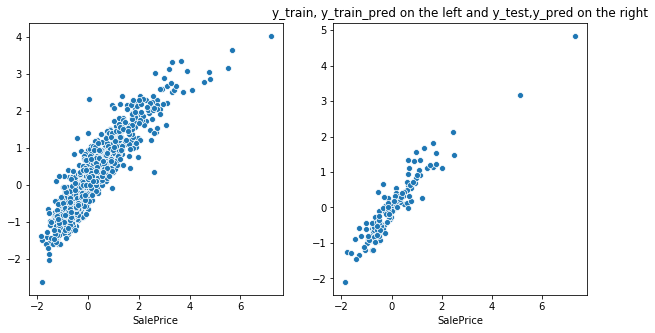

In [84]:
fig,ax = plt.subplots(nrows = 1,ncols=2, figsize=(10,5))
sns.scatterplot(x=y_train, y=y_train_pred,ax=ax[0])
sns.scatterplot(x=y_test, y=y_pred,ax=ax[1])
plt.title("y_train, y_train_pred on the left and y_test,y_pred on the right")
#plt.scatter(x=y_pred, y=range(len(y_test)),c='#ff7f0e')
#['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

As, we can see that training data is well alligned towards the origin however test data is deviating from the center 

The Prediction $R^2$ Score is around `85%` for Linear Regression using RFE with number of features = 25.
And Train dataset $R^2$ is `83%`. 
But if we don't use RFE then test $R^2$ dips down to `-20`. Clearly overfitting is there

Furthermore Linear regression is comutationally more intensive than `Ridge and Lasso`.
Grid Search for Linear model using rfe hyperparameter was not possible because of large number of columns which made it comutationally difficult to perform

### `Ridge Regression`

In [85]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 10
model_cvr = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cvr.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    2.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [86]:
cv_results_r = pd.DataFrame(model_cvr.cv_results_)
cv_results_r = cv_results_r[cv_results_r['param_alpha']<=200]
cv_results_r.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007978      0.000630         0.000898    2.991836e-04      0.0001   
1       0.007675      0.000454         0.000903    3.013520e-04       0.001   
2       0.008378      0.001558         0.001098    2.989196e-04        0.01   
3       0.007978      0.000446         0.000899    2.996364e-04        0.05   
4       0.007779      0.000399         0.000997    9.536743e-08         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.237295          -0.311152          -0.316674   
1   {'alpha': 0.001}          -0.237298          -0.310033          -0.316625   
2    {'alpha': 0.01}          -0.237479          -0.300180          -0.316134   
3    {'alpha': 0.05}          -0.241027          -0.275550          -0.314199   
4     {'alpha': 0.1}          -0.246093          -0.263635          -0.311812   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -0.284165          -0.246718          -0.215779          -0.240014   
1          -0.283826          -0.246282          -0.215377          -0.240268   
2          -0.281424          -0.242809          -0.212645          -0.242865   
3          -0.278436          -0.234028          -0.212712          -0.249452   
4          -0.277711          -0.229366          -0.217255          -0.254788   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0          -0.333352          -0.254734          -0.229134        -0.266910   
1          -0.331662          -0.254672          -0.229265        -0.266539   
2          -0.316859          -0.254417          -0.230312        -0.263520   
3          -0.281857          -0.257792          -0.233804        -0.257893   
4          -0.262268          -0.260516          -0.235377        -0.255890   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.039166               28           -0.176783           -0.178460   
1        0.038781               27           -0.176801           -0.178515   
2        0.035482               25           -0.177459           -0.179226   
3        0.028356               24           -0.182311           -0.183784   
4        0.025408               23           -0.187012           -0.188372   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.168567           -0.171377           -0.180840   
1           -0.168571           -0.171362           -0.180914   
2           -0.168628           -0.171652           -0.181815   
3           -0.169099           -0.176570           -0.186610   
4           -0.169598           -0.181495           -0.191189   

   split5_train_score  split6_train_score  split7_train_score  \
0           -0.179796           -0.175670           -0.180550   
1           -0.179856           -0.175719           -0.180598   
2           -0.180753           -0.176700           -0.181222   
3           -0.186530           -0.182542           -0.185075   
4           -0.191649           -0.187401           -0.189083   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0           -0.178286           -0.176180         -0.176651         0.003781  
1           -0.178345           -0.176302         -0.176698         0.003803  
2           -0.179081           -0.177694         -0.177423         0.004026  
3           -0.183922           -0.183762         -0.182020         0.005075  
4           -0.188376           -0.188497         -0.186267         0.006144

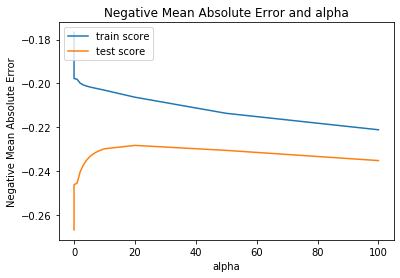

In [87]:
# plotting mean test and train scoes with alpha 
cv_results_r['param_alpha'] = cv_results_r['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_train_score'])
plt.plot(cv_results_r['param_alpha'], cv_results_r['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [88]:
max_ridge_alpha = max(cv_results_r['mean_test_score'])
cv_results_r[cv_results_r['mean_test_score']==max_ridge_alpha]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
23       0.007779      0.000399         0.000898        0.000299           20   

           params  split0_test_score  split1_test_score  split2_test_score  \
23  {'alpha': 20}           -0.24864          -0.217245          -0.265424   

    split3_test_score  split4_test_score  split5_test_score  \
23          -0.253333          -0.183728          -0.216607   

    split6_test_score  split7_test_score  split8_test_score  \
23          -0.238279          -0.198044          -0.243348   

    split9_test_score  mean_test_score  std_test_score  rank_test_score  \
23          -0.218357        -0.228312        0.024521                1   

    split0_train_score  split1_train_score  split2_train_score  \
23             -0.2069           -0.208262            -0.19072   

    split3_train_score  split4_train_score  split5_train_score  \
23           -0.202124           -0.212289           -0.208971   

    split6_train_score  split7_train_score  split8_train_score  \
23            -0.20613           -0.210346           -0.208116   

    split9_train_score  mean_train_score  std_train_score  
23           -0.209243          -0.20631         0.005794

In [121]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.0878386 ,  0.0498414 ,  0.20759816,  0.0651282 ,  0.06020762,
        0.03148202,  0.04909292,  0.03319043,  0.00479211, -0.02013218,
        0.01621357,  0.06041126,  0.15742622,  0.00164887,  0.17472794,
        0.06444739, -0.00138009,  0.08367016,  0.04933767, -0.04857405,
       -0.02980304,  0.08520212,  0.03050495,  0.10200895, -0.01911446,
        0.02930617, -0.0019616 ,  0.01089268,  0.01632033,  0.0275391 ,
       -0.00387097, -0.00727138, -0.00585197, -0.01037257,  0.08622155,
        0.01451302,  0.07666684, -0.00409566,  0.13402217,  0.09527323,
       -0.1804205 , -0.00729845,  0.17192525,  0.06106291,  0.15693024,
       -0.04801801,  0.14096949, -0.06689514, -0.05436233, -0.00811726,
        0.11414781, -0.0645895 , -0.01248115,  0.02286825,  0.0468952 ,
       -0.02271326, -0.10256521,  0.17173597, -0.21138027, -0.15509398,
       -0.06024345, -0.03962833, -0.14785189, -0.12035916,  0.02208872,
       -0.13384952,  0.3512959 ,  0.3621209 , -0.09968632, -0.05

In [122]:
ridge_pred = ridge.predict(X_test)

In [123]:
ridge_pred_train = ridge.predict(X_train)

Prediction $R^2$ is below

In [124]:
ridge.score(X_test,y_test)

0.8721268196617036

Training $R^2$ is below

In [125]:
ridge.score(X_train,y_train)

0.886926032880223

Text(0.5, 1.0, 'y_train, y_train_pred on the left and y_test,y_pred on the right')

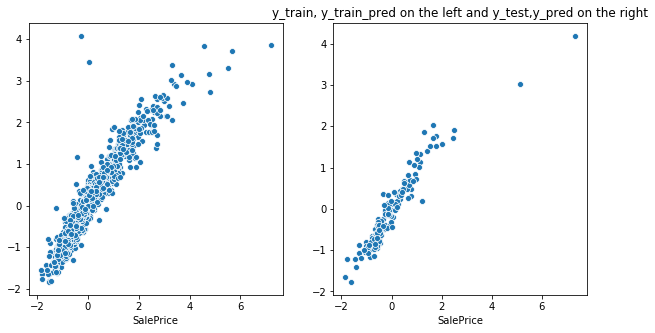

In [94]:
fig,ax = plt.subplots(nrows = 1,ncols=2, figsize=(10,5))
sns.scatterplot(x=y_train, y=ridge_pred_train,ax=ax[0])
sns.scatterplot(x=y_test, y=ridge_pred,ax=ax[1])
plt.title("y_train, y_train_pred on the left and y_test,y_pred on the right")

Both the scatter plots looks quite similar, we can say model is well fitted

In [95]:
mse = np.mean((ridge_pred - y_test)**2)
mse

0.15525594509227333

The Prediction $R^2$ Score is around `87%` for Ridge Regression and Train $R^2$ Score is 88% with `mean square error is 0.155`

### `Lasso Regression`

In [96]:
lasso = Lasso()

# cross validation
model_cvl = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cvl.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\ankit.chaturvedi\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7151724178520595, tolerance: 0.11568332170727916
  positive)
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    3.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [97]:
cv_results_l = pd.DataFrame(model_cvl.cv_results_)
cv_results_l = cv_results_l[cv_results_l['param_alpha']<=200]
cv_results_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.061137      0.031030         0.000997        0.000001      0.0001   
1       0.042782      0.003928         0.001000        0.000008       0.001   
2       0.008871      0.000698         0.001195        0.000385        0.01   
3       0.006587      0.000481         0.000898        0.000300        0.05   
4       0.006389      0.000483         0.000995        0.000013         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.229637          -0.286963          -0.305696   
1   {'alpha': 0.001}          -0.237605          -0.224027          -0.284990   
2    {'alpha': 0.01}          -0.275416          -0.223108          -0.307150   
3    {'alpha': 0.05}          -0.298105          -0.265052          -0.332115   
4     {'alpha': 0.1}          -0.311578          -0.297705          -0.351967   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0          -0.274525          -0.190760          -0.207328          -0.235646   
1          -0.255059          -0.186762          -0.218864          -0.245895   
2          -0.282361          -0.194080          -0.242276          -0.256063   
3          -0.306249          -0.232581          -0.293297          -0.292928   
4          -0.321253          -0.263351          -0.320117          -0.305958   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0          -0.295768          -0.248909          -0.217175        -0.249240   
1          -0.204374          -0.252619          -0.214783        -0.232507   
2          -0.222144          -0.262568          -0.256951        -0.252220   
3          -0.250846          -0.312666          -0.281357        -0.286526   
4          -0.274368          -0.341875          -0.292086        -0.308039   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.037691                2           -0.179458           -0.180658   
1        0.027090                1           -0.204848           -0.206673   
2        0.031403                3           -0.240634           -0.242902   
3        0.028376                4           -0.281628           -0.284465   
4        0.026279                5           -0.304275           -0.306823   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.170992           -0.174037           -0.184230   
1           -0.183967           -0.201637           -0.210358   
2           -0.230152           -0.234403           -0.248047   
3           -0.265782           -0.274425           -0.286877   
4           -0.285449           -0.296514           -0.307554   

   split5_train_score  split6_train_score  split7_train_score  \
0           -0.182647           -0.179181           -0.183015   
1           -0.207567           -0.205154           -0.208667   
2           -0.245607           -0.243136           -0.247147   
3           -0.283137           -0.280418           -0.286093   
4           -0.304297           -0.303455           -0.310483   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0           -0.180814           -0.180215         -0.179525         0.003880  
1           -0.203934           -0.207709         -0.204051         0.007105  
2           -0.240939           -0.244237         -0.241720         0.005324  
3           -0.279593           -0.283887         -0.280630         0.006013  
4           -0.301333           -0.307054         -0.302724         0.006807

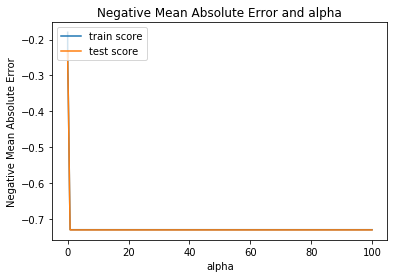

In [98]:
# plotting mean test and train scoes with alpha 
cv_results_l['param_alpha'] = cv_results_l['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [99]:
max_lasso_alpha = max(cv_results_l['mean_test_score'])
cv_results_l[cv_results_l['mean_test_score']==max_lasso_alpha]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
1       0.042782      0.003928            0.001        0.000008        0.001   

             params  split0_test_score  split1_test_score  split2_test_score  \
1  {'alpha': 0.001}          -0.237605          -0.224027           -0.28499   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
1          -0.255059          -0.186762          -0.218864          -0.245895   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
1          -0.204374          -0.252619          -0.214783        -0.232507   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
1         0.02709                1           -0.204848           -0.206673   

   split2_train_score  split3_train_score  split4_train_score  \
1           -0.183967           -0.201637           -0.210358   

   split5_train_score  split6_train_score  split7_train_score  \
1           -0.207567           -0.205154           -0.208667   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
1           -0.203934           -0.207709         -0.204051         0.007105

In [100]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
lasso.coef_

array([-7.77034254e-02,  4.91964013e-02,  1.96952971e-01,  6.67650222e-02,
        7.82141426e-02,  2.84833563e-02,  4.43005377e-02,  4.81483607e-02,
        8.49743048e-03, -4.35166754e-03,  0.00000000e+00,  0.00000000e+00,
        7.07889050e-02, -1.16687897e-02,  2.69937555e-01,  6.11175594e-02,
        7.49648492e-04,  7.69179512e-02,  3.50491548e-02, -4.73508782e-02,
       -2.69554787e-02,  7.69195492e-02,  2.75336474e-02,  8.96588447e-02,
       -9.65390933e-03,  2.40655864e-02,  0.00000000e+00,  5.14371864e-03,
        1.25313871e-02,  2.72192005e-02, -3.22810044e-03, -7.03609373e-03,
       -5.05851479e-03, -8.76123763e-03,  5.92576396e-02,  0.00000000e+00,
        5.94935970e-02, -0.00000000e+00,  1.70221706e-01,  6.50309215e-02,
       -2.33474065e-01,  0.00000000e+00,  1.50243596e-01,  2.42862183e-02,
        1.34621665e-01, -0.00000000e+00,  1.54994437e-01, -3.20733280e-02,
       -0.00000000e+00, -0.00000000e+00,  1.03431739e-01, -0.00000000e+00,
       -0.00000000e+00,  

In [102]:
lasso_pred = lasso.predict(X_test)

In [103]:
lasso_pred_train = lasso.predict(X_train)

In [104]:
lasso.score(X_test,y_test)

0.8857195627490981

In [105]:
lasso.score(X_train,y_train)

0.8906758668277343

In [106]:
mse = np.mean((lasso_pred - y_test)**2)
mse

0.13875245179644036

Text(0.5, 1.0, 'y_train, y_train_pred on the left and y_test,y_pred on the right')

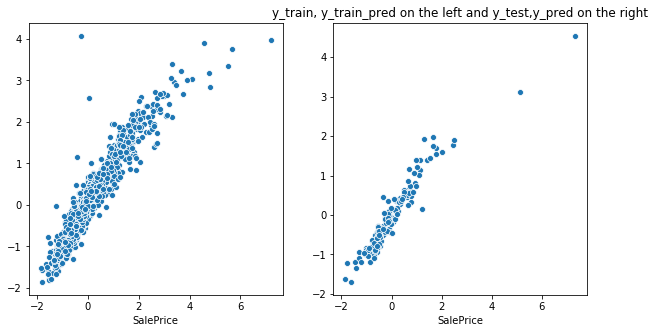

In [107]:
fig,ax = plt.subplots(nrows = 1,ncols=2, figsize=(10,5))
sns.scatterplot(x=y_train, y=lasso_pred_train,ax=ax[0])
sns.scatterplot(x=y_test, y=lasso_pred,ax=ax[1])
plt.title("y_train, y_train_pred on the left and y_test,y_pred on the right")

Because all the coefficients turn out to zero , lasso is not able to predict the model 

The Prediction $R^2$ Score is around `88%` for Lasso Regression and Train $R^2$ Score is `89%` with `mean square error is 0.13`

Lasso is the best performing moddel compared to Ridge and Linear regression with RFE.
When Linear regression without RFE is used then it shows clear sign of overfitting with test $R^2$ equal to -20

Here, the key fact about LASSO regression is that it minimizes sum of squared error, under the constraint that the sum of absolute values of coefficients is less than some constant c.So, for all of the coefficients to be zero, there must be no vector of coefficients with summed absolute value less than c that improves error.

For another view, consider the LASSO loss function:

$\sum_{i=1}^{n}(Yi−XTiβ)+λ\sum_{j=1}^{p}|βj|$ <br>
"If λ is sufficiently large, some of the coefficients are driven to zero, leading to a sparse model." For it to be the case that zero coefficients minimize this function, λ must be large enough that any improvement in error (the left term) is less than the added loss from the increased norm (the right term).


### So our Final model is Lasso regression model with $R^2$ value equal to 88% on Test Data with mean square error equal to 0.13

In [114]:
lasso

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Our selection for lasso is also because of automatic feature selection